#Developing the method to read pdf files

In [ ]:
pip install PyMupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.1 MB/s eta 0:00:00


In [ ]:
import fitz
import warnings
def read_pdf(file_path):
    pdf_text = ""
    document = fitz.open(file_path)
    for page_num in range(document.page_count):
        page = document.load_page(page_num)
        pdf_text += page.get_text()
    return pdf_text

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
data=pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   record_number                  244 non-null    int64 
 1   resume_skills                  244 non-null    object
 2   resume_work_experience         242 non-null    object
 3   resume_project_work            244 non-null    object
 4   resume_certification_training  244 non-null    object
 5   job_description_requirement    244 non-null    object
 6   job_description_roles          244 non-null    object
 7   matching_score                 244 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 15.4+ KB


In [ ]:
data=pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   record_number                  244 non-null    int64 
 1   resume_skills                  244 non-null    object
 2   resume_work_experience         242 non-null    object
 3   resume_project_work            244 non-null    object
 4   resume_certification_training  244 non-null    object
 5   job_description_requirement    244 non-null    object
 6   job_description_roles          244 non-null    object
 7   matching_score                 244 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 15.4+ KB


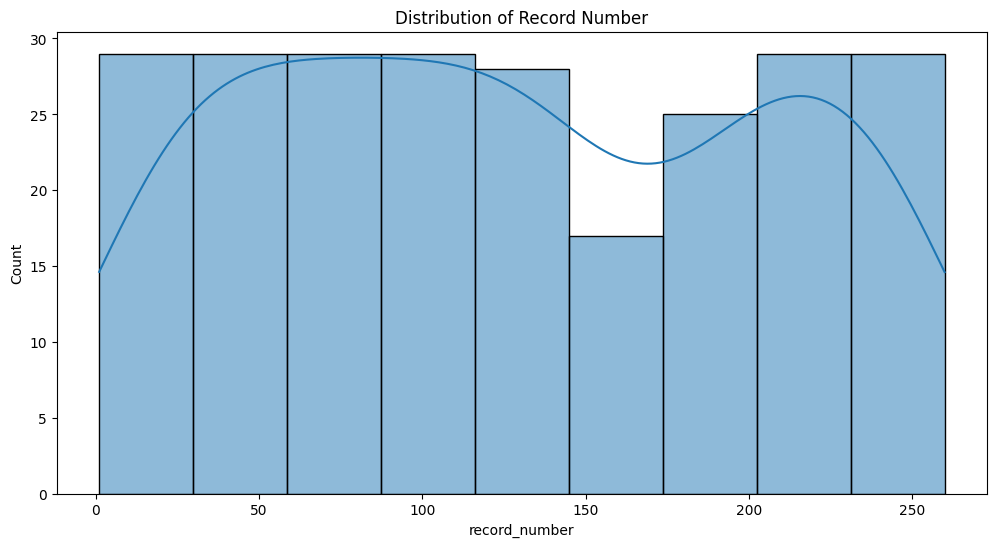

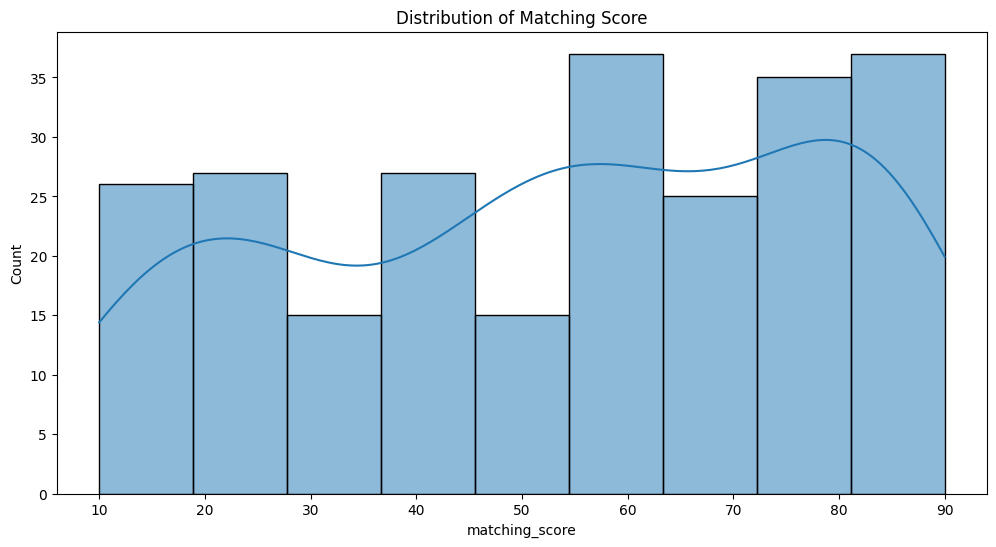

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of record_number
plt.figure(figsize=(12, 6))
sns.histplot(data['record_number'], kde=True)
plt.title('Distribution of Record Number')
plt.show()

# Distribution of matching_score
plt.figure(figsize=(12, 6))
sns.histplot(data['matching_score'], kde=True)
plt.title('Distribution of Matching Score')
plt.show()

In [ ]:
for column in data.select_dtypes(include='object').columns:
    print(f"Unique values in {column}:")
    print(data[column].value_counts())
    print("\n")

Unique values in resume_skills:
resume_skills
Java, Python, JavaScript, React, Node.js, HTML, CSS                                 8
Java, Python, SQL, JavaScript, Angular, HTML, CSS                                   8
Java, Python, SQL, JavaScript, Vue.js, HTML, CSS                                    7
UX/UI Design, Prototyping, User Research, Wireframing, Adobe XD, Sketch             6
Marketing Strategy, Product Launches, Market Analysis, Advertising, Facebook Ads    3
                                                                                   ..
Java, Python, Angular, HTML, CSS                                                    1
Java, JavaScript, Node.js, HTML, CSS                                                1
Java, Python, SQL, HTML, CSS                                                        1
Java, Python, JavaScript, HTML, CSS                                                 1
Python, SQL, Excel, Tableau, Data Visualization                                     1
Name: co

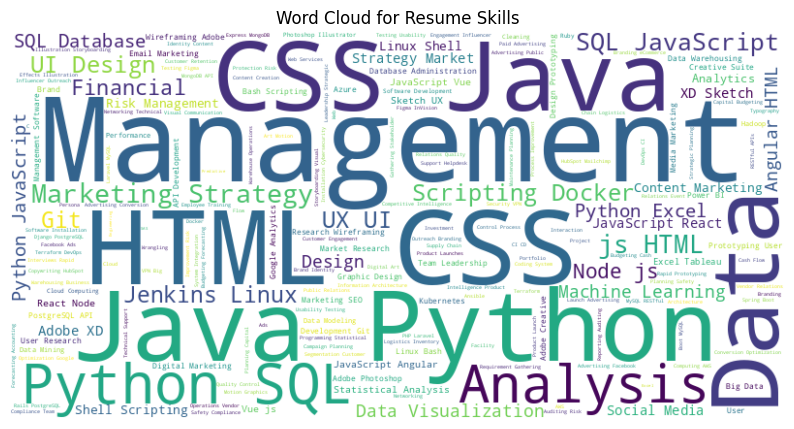

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example for resume_skills
plot_wordcloud(data['resume_skills'], 'Word Cloud for Resume Skills')

#Finding the best model using cross_val_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Logistic Regression: 0.8375 (0.13608985094732154)
Decision Tree: 0.8625 (0.10819970390867956)
Random Forest: 0.8625 (0.10819970390867956)
Support Vector Machine: 0.8597222222222222 (0.08549285220284662)
K-Nearest Neighbors: 0.8736111111111111 (0.11577869747981905)
Gradient Boosting: 0.8625 (0.10819970390867956)


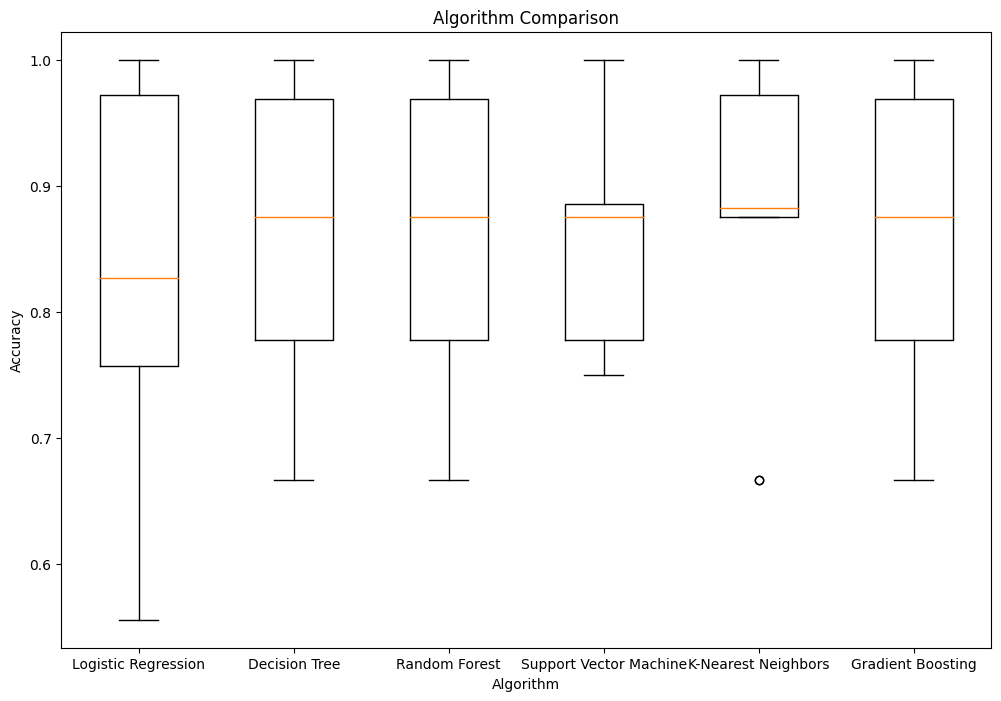

Best model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.86      1.00      0.92        12

    accuracy                           0.88        17
   macro avg       0.93      0.80      0.84        17
weighted avg       0.90      0.88      0.87        17



In [ ]:


# Load the data
df = pd.read_csv('Dataset.csv')

# Drop rows with null values in the JD column
df = df.dropna(subset=['JD'])

# Initialize NLTK components
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to Resumes and JDs
df['Resumes'] = df['Resumes'].apply(preprocess_text)
df['JD'] = df['JD'].apply(preprocess_text)

# Combine Resumes and JDs for TF-IDF vectorization
combined_text = df['Resumes'].tolist() + df['JD'].tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Split the TF-IDF matrix back into Resumes and JDs
resumes_tfidf = tfidf_matrix[:len(df)]
jd_tfidf = tfidf_matrix[len(df):]

# Calculate cosine similarity between Resumes and JDs
similarity_matrix = cosine_similarity(resumes_tfidf, jd_tfidf)

# Add similarity scores to the DataFrame
df['similarity'] = [similarity_matrix[i][i] for i in range(len(df))]

# Define feature and target variables
X = df[['similarity']]
y = df['Result']

# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Evaluate each model using cross-validation
results = []
names = []
mean_scores = []
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    mean_scores.append(cv_results.mean())
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

# Plot the results for comparison
plt.figure(figsize=(12, 8))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

# Find the best model based on cross-validation mean score
best_model_name = names[mean_scores.index(max(mean_scores))]
best_model = models[mean_scores.index(max(mean_scores))][1]
print(f"Best model: {best_model_name}")

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model on the training set and evaluate
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

In [ ]:
pd.DataFrame({'Ytest':y_test,'Y_pred':y_pred})

,Ytest,Y_pred
79,0,1
0,1,1
69,1,1
23,1,1
12,1,1
83,0,0
10,1,1
19,0,0
4,1,1
67,1,1


In [ ]:
df['Result'].value_counts()

Result
0    43
1    42
Name: count, dtype: int64

In [ ]:
resume=read_pdf('res.pdf')
jd=read_pdf('jd.pdf')

#Testing the record that had been provided.

In [ ]:
# Function to vectorize and calculate similarity for a single resume and job description
def calculate_similarity(resume, jd):
    # Preprocess the texts
    preprocessed_resume = preprocess_text(resume)
    preprocessed_jd = preprocess_text(jd)

    # Transform the texts using the TF-IDF vectorizer
    resume_tfidf = tfidf_vectorizer.transform([preprocessed_resume])
    jd_tfidf = tfidf_vectorizer.transform([preprocessed_jd])

    # Calculate cosine similarity
    similarity = cosine_similarity(resume_tfidf, jd_tfidf)[0][0]
    return similarity

# Function to test a single record using the best model
def test_single_record(resume, jd):
    # Calculate similarity
    similarity = calculate_similarity(resume, jd)

    # Predict the result using the best model
    prediction = best_model.predict([[similarity]])
    return prediction[0]

# Example resume and job description
example_resume = resume
example_jd = jd

# Test the single record
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    result = test_single_record(example_resume, example_jd)
print(f"Prediction for the single record: {result}")
if result==0:
  print('The resume and jd does not match.👋')
else:
  print('The resume matches.👍')

Prediction for the single record: 1
The resume matches.👍


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 0 to 83
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sno         83 non-null     int64  
 1   Resumes     83 non-null     object 
 2   JD          83 non-null     object 
 3   Result      83 non-null     int64  
 4   similarity  83 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ KB


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Logistic Regression: 0.8458333333333332 (0.14796067420470585)
Decision Tree: 0.8444444444444444 (0.10914934835771388)
Random Forest: 0.8444444444444444 (0.10914934835771388)
Support Vector Machine: 0.8819444444444444 (0.09006384909374152)
K-Nearest Neighbors: 0.8458333333333332 (0.1250694251650303)
Gradient Boosting: 0.8444444444444444 (0.10914934835771388)


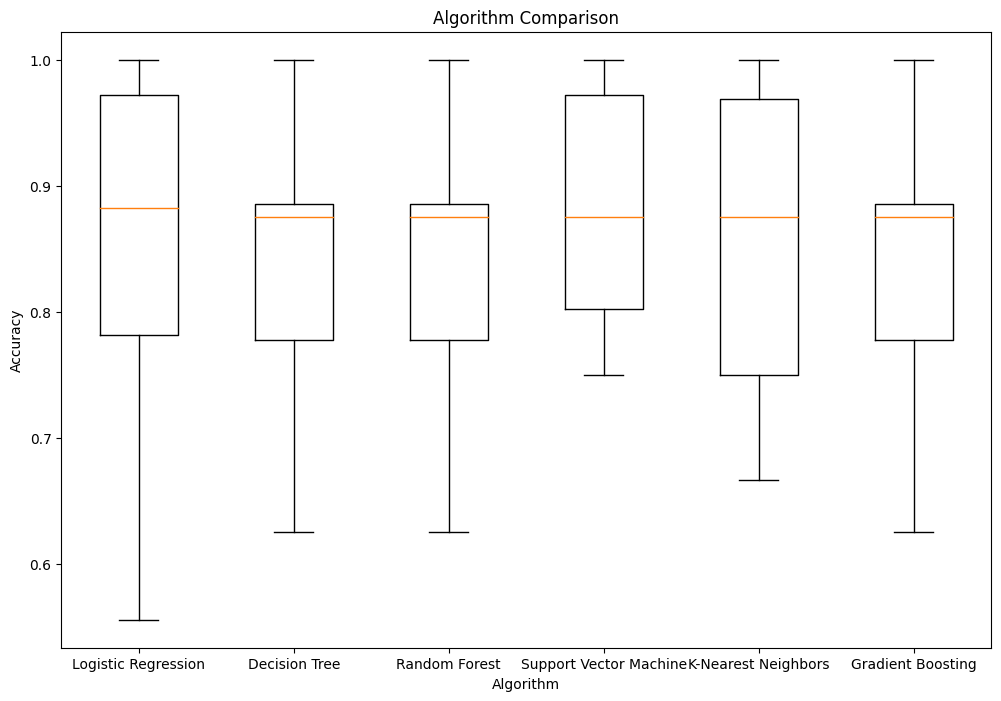

Best model: Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Prediction for the single record: 0
Match Percentage: 7.30%
The resume and jd do not match.👋


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings

# Load the data
df = pd.read_csv('Dataset.csv')

# Drop rows with null values in the JD column
df = df.dropna(subset=['JD'])

# Initialize NLTK components
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to Resumes and JDs
df['Resumes'] = df['Resumes'].apply(preprocess_text)
df['JD'] = df['JD'].apply(preprocess_text)

# Combine Resumes and JDs for TF-IDF vectorization
combined_text = df['Resumes'].tolist() + df['JD'].tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Split the TF-IDF matrix back into Resumes and JDs
resumes_tfidf = tfidf_matrix[:len(df)]
jd_tfidf = tfidf_matrix[len(df):]

# Calculate cosine similarity between Resumes and JDs
similarity_matrix = cosine_similarity(resumes_tfidf, jd_tfidf)

# Add similarity scores to the DataFrame
df['similarity'] = [similarity_matrix[i][i] for i in range(len(df))]
df['match_percentage'] = df['similarity'] * 100  # Add match percentage

# Define feature and target variables
X = df[['similarity']]
y = df['Result']

# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Evaluate each model using cross-validation
results = []
names = []
mean_scores = []
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    mean_scores.append(cv_results.mean())
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")

# Plot the results for comparison
plt.figure(figsize=(12, 8))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

# Find the best model based on cross-validation mean score
best_model_name = names[mean_scores.index(max(mean_scores))]
best_model = models[mean_scores.index(max(mean_scores))][1]
print(f"Best model: {best_model_name}")

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model on the training set and evaluate
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Function to vectorize and calculate similarity for a single resume and job description
def calculate_similarity(resume, jd):
    # Preprocess the texts
    preprocessed_resume = preprocess_text(resume)
    preprocessed_jd = preprocess_text(jd)

    # Transform the texts using the TF-IDF vectorizer
    resume_tfidf = tfidf_vectorizer.transform([preprocessed_resume])
    jd_tfidf = tfidf_vectorizer.transform([preprocessed_jd])

    # Calculate cosine similarity
    similarity = cosine_similarity(resume_tfidf, jd_tfidf)[0][0]
    return similarity

# Function to test a single record using the best model
def test_single_record(resume, jd):
    # Calculate similarity
    similarity = calculate_similarity(resume, jd)
    match_percentage = similarity * 100  # Calculate match percentage

    # Predict the result using the best model
    prediction = best_model.predict([[similarity]])
    return prediction[0], match_percentage

# Example resume and job description
example_resume = read_pdf('/content/Resume_Prasad.pdf')
example_jd = read_pdf('/content/Job-desc-sample.pdf')

# Test the single record
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    result, match_percentage = test_single_record(example_resume, example_jd)
print(f"Prediction for the single record: {result}")
print(f"Match Percentage: {match_percentage:.2f}%")
if result == 0:
    print('The resume and jd do not match.👋')
else:
    print('The resume matches.👍')
